In [74]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape

# Load Dataset

In [95]:
data = arff.loadarff('EEG Eye State.arff')
df = pd.DataFrame(data[0])

# EDA

In [96]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [16]:
df.shape

(14980, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  object 
dtypes: float64(14), object(1)
memory usage: 1.7+ MB


In [18]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000


In [19]:
df.describe(include=object)

,eyeDetection
count,14980
unique,2
top,b'0'
freq,8257


In [20]:
df['eyeDetection'].value_counts()

eyeDetection
b'0'    8257
b'1'    6723
Name: count, dtype: int64

In [21]:
df['eyeDetection'] = df['eyeDetection'].replace({b'0' : 0 , b'1' :1})

In [22]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [23]:
df.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [25]:
data_1 = df.copy()
data_1.drop('eyeDetection', axis=1, inplace=True)
data_1.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46


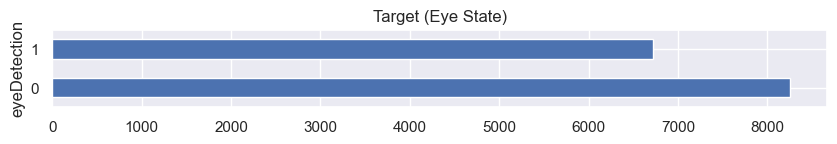

In [87]:
# Display Target 
df['eyeDetection'].value_counts().plot(kind='barh',
                                       title='Target (Eye State)',
                                       figsize=(10, 1),
                                      )
plt.yticks([0, 1])
plt.show()

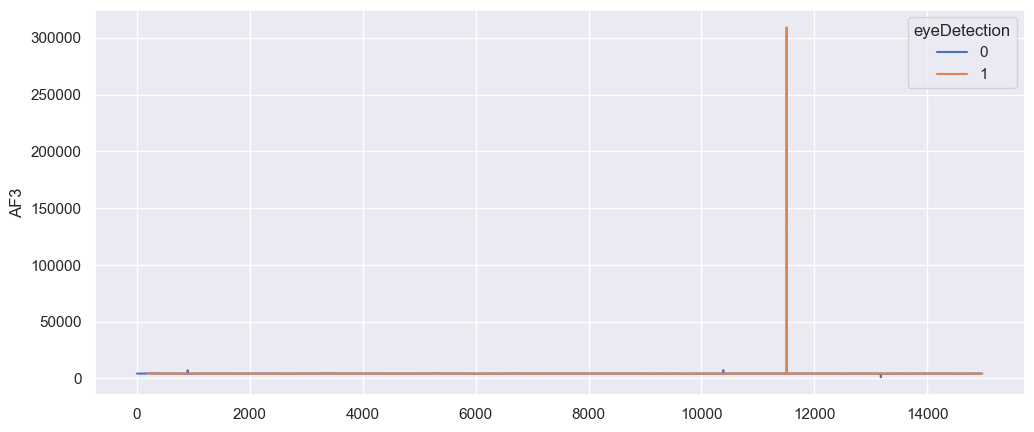

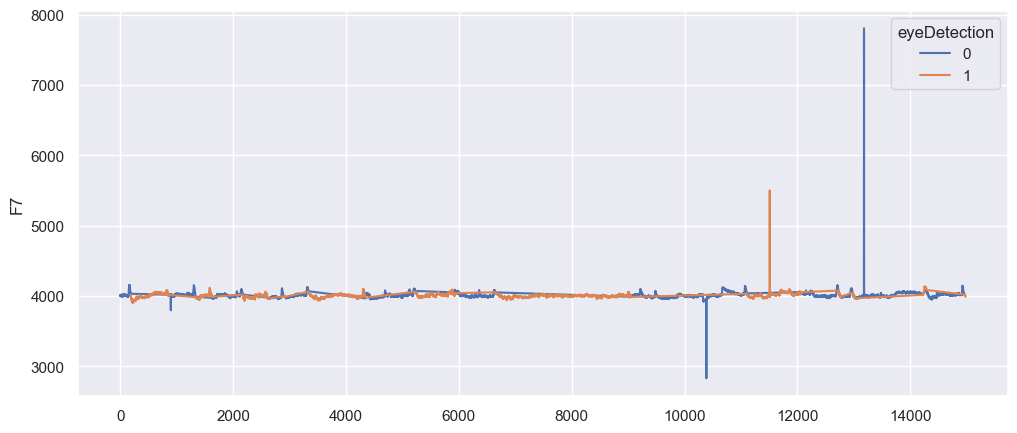

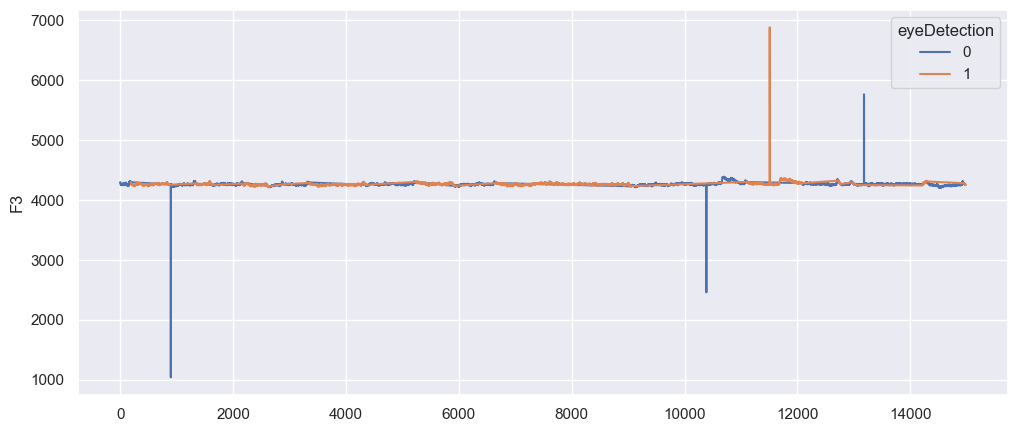

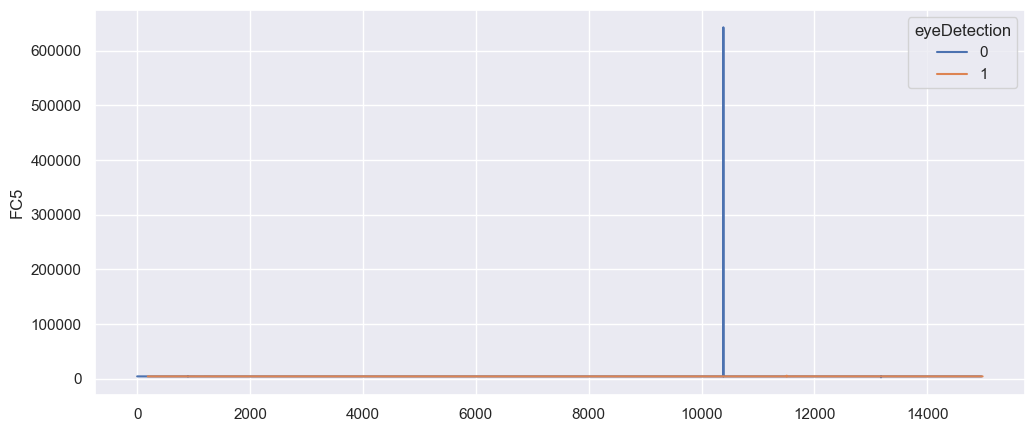

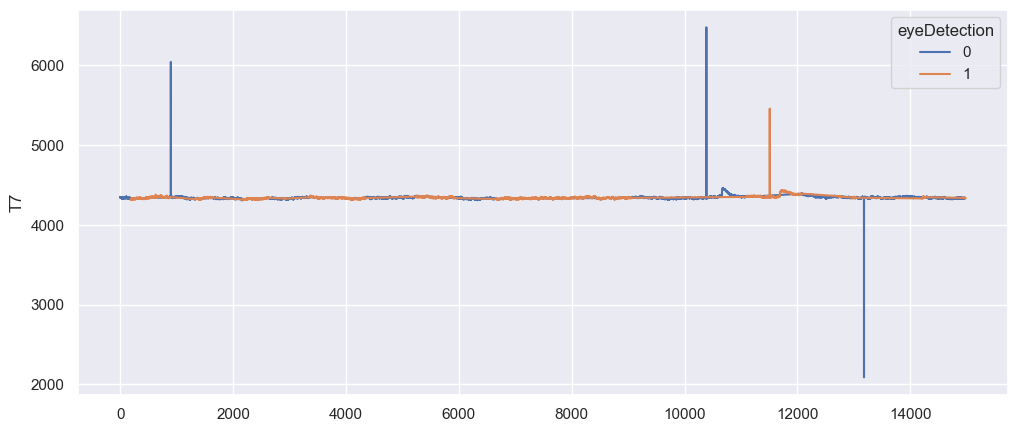

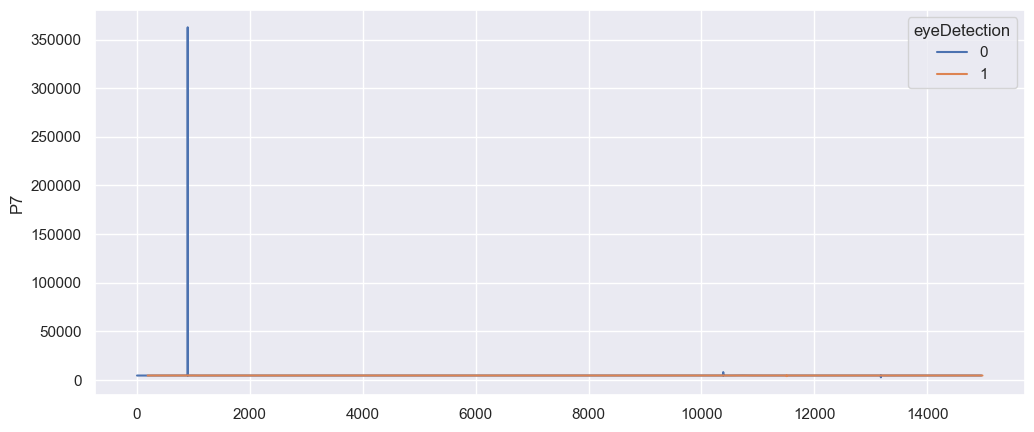

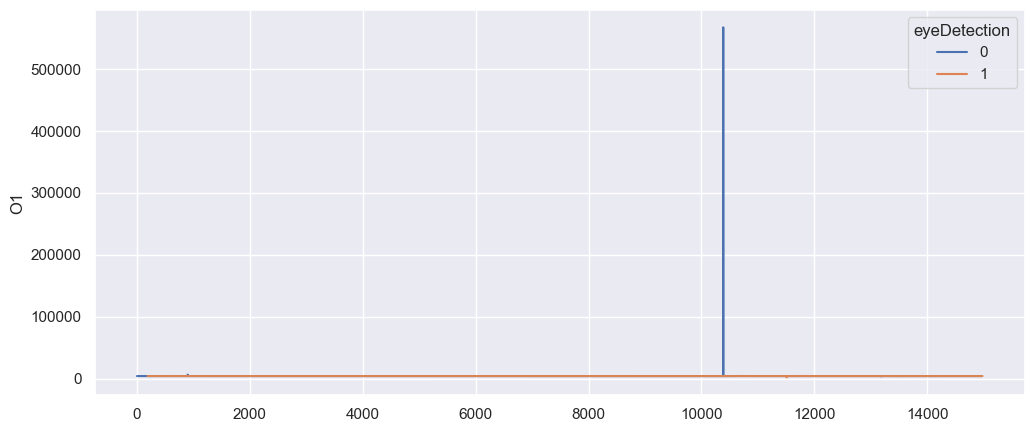

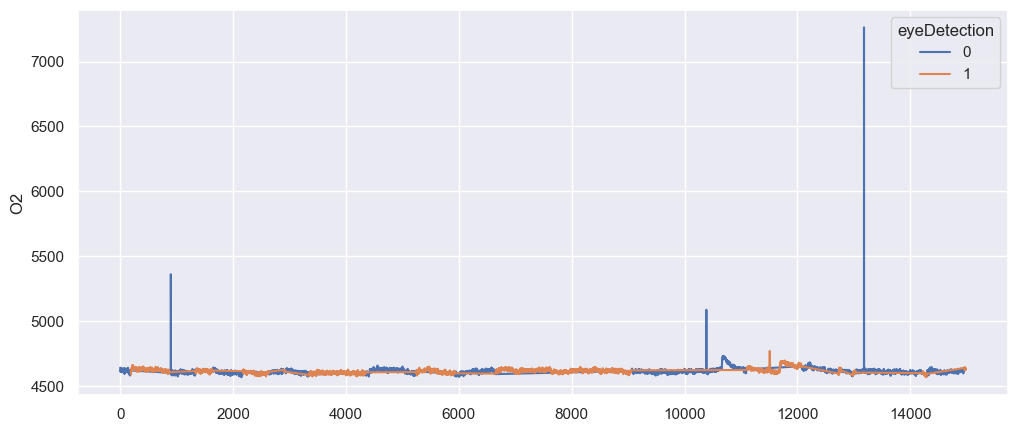

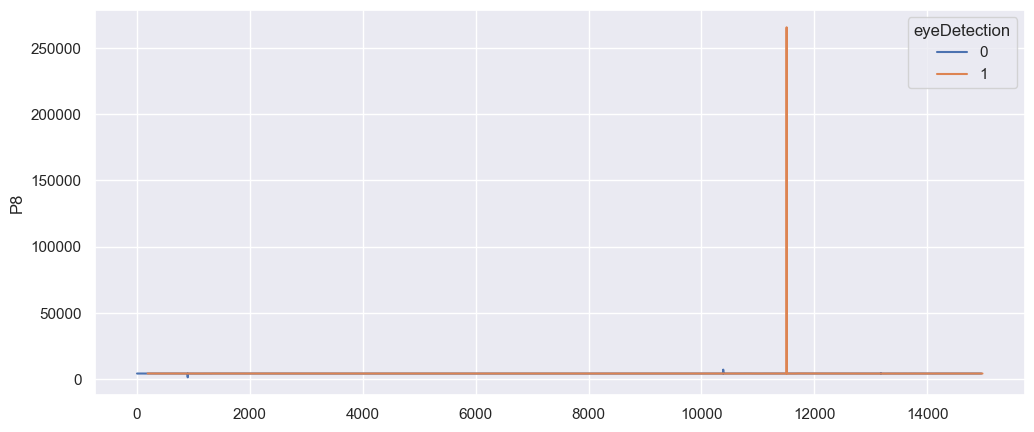

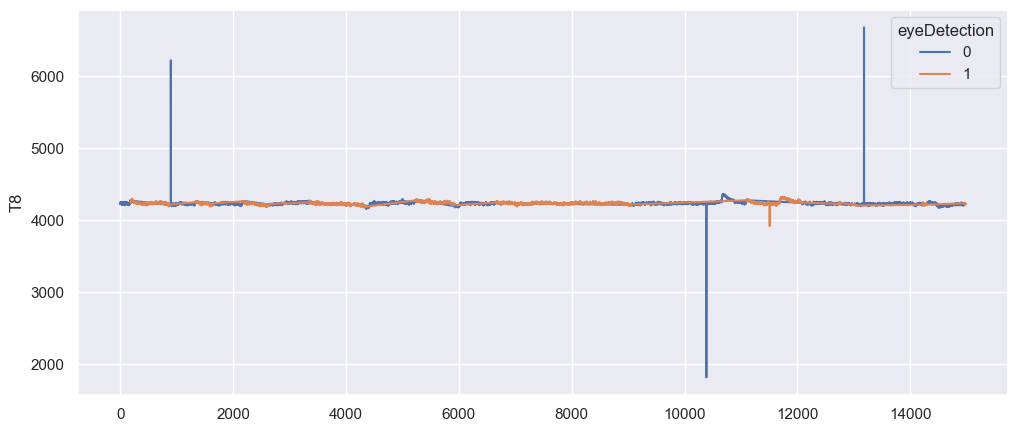

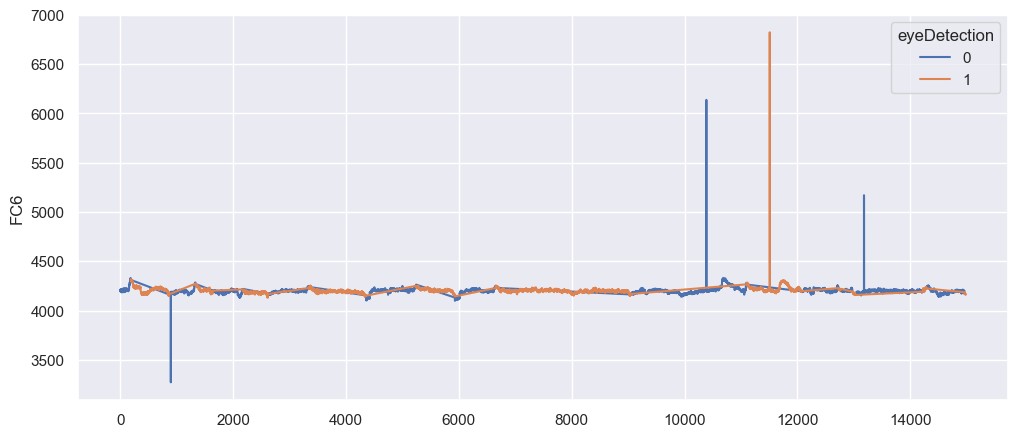

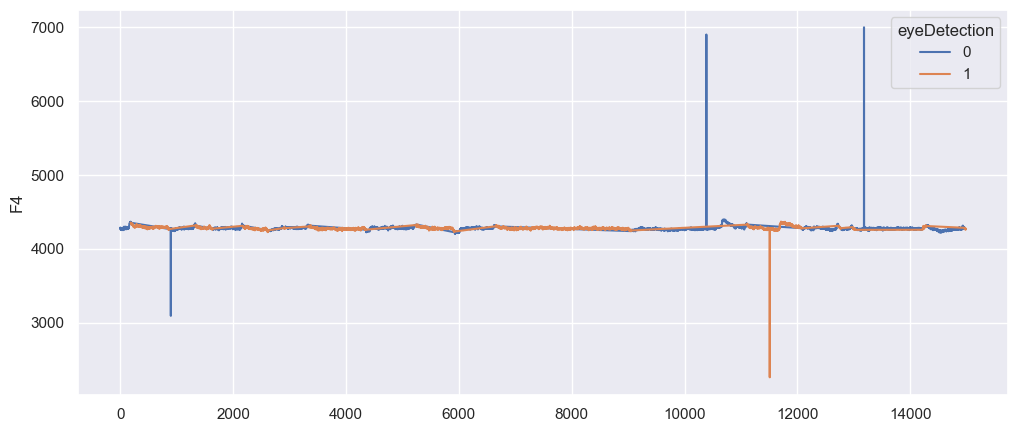

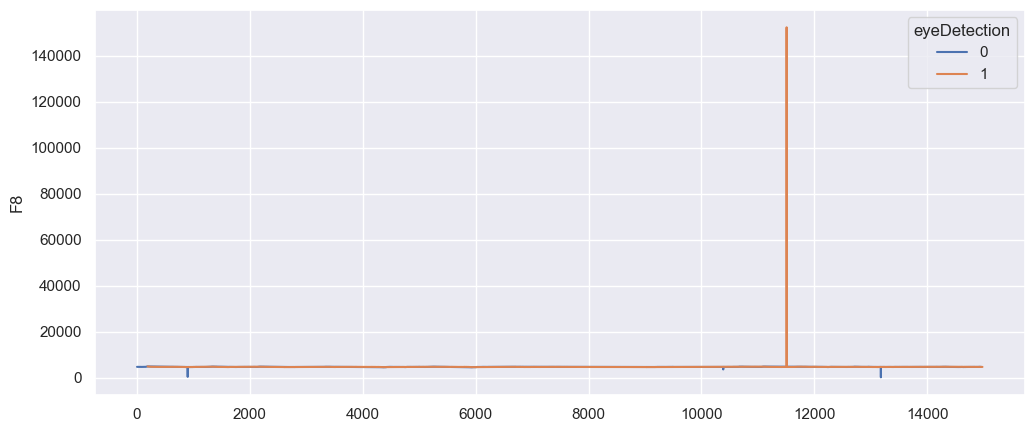

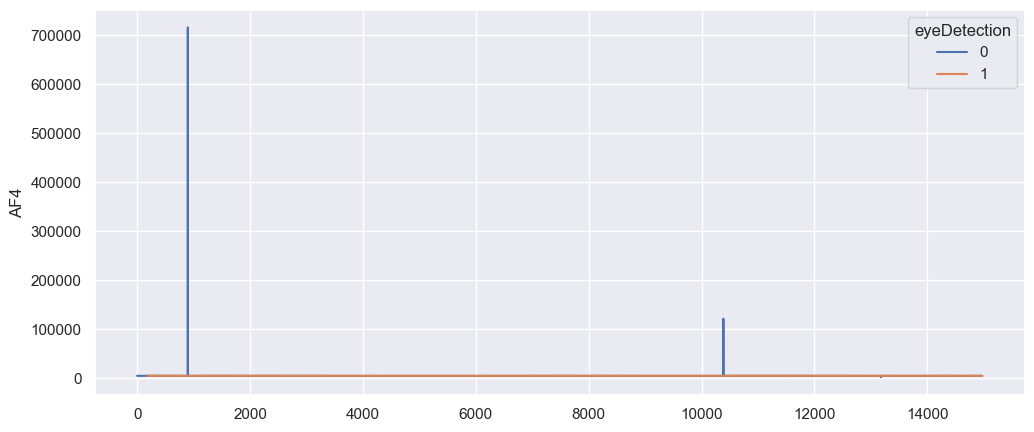

In [26]:
sns.set_theme(style='darkgrid')
for col in df.columns[0:-1]:
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=df.index, y=col, data=df, hue="eyeDetection")
    plt.show()

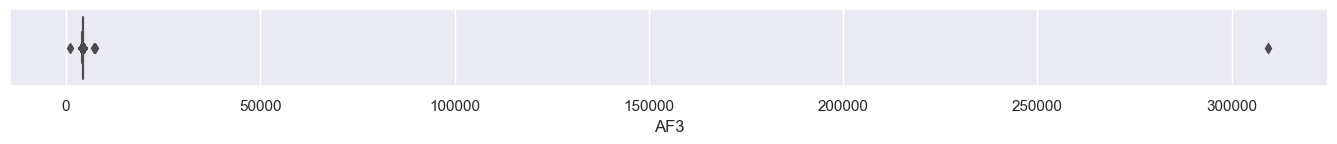

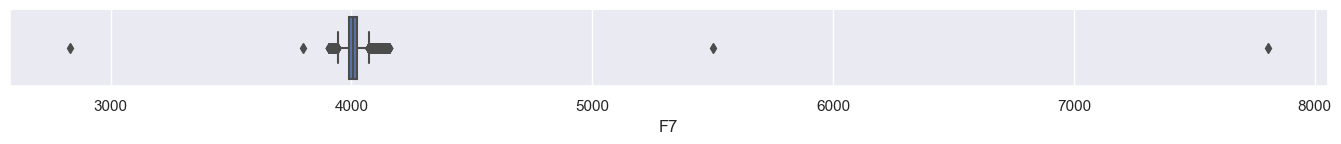

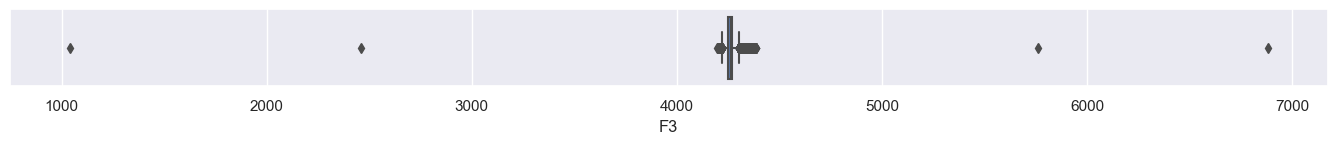

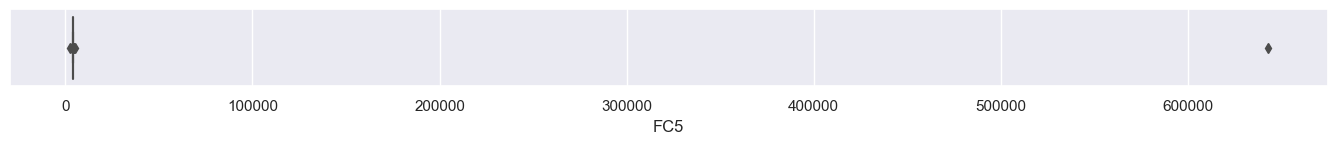

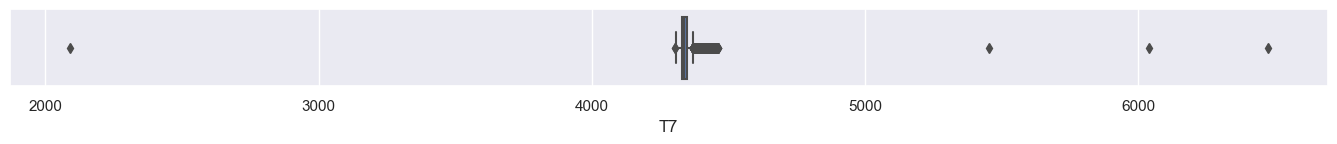

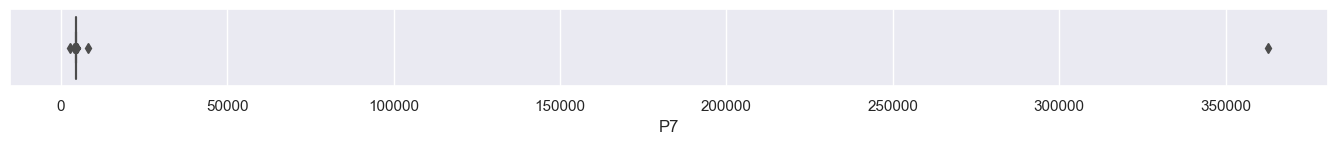

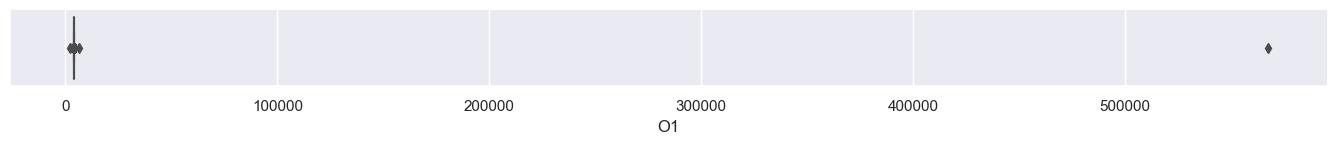

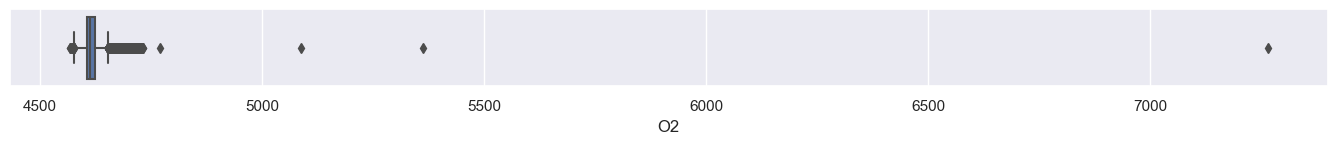

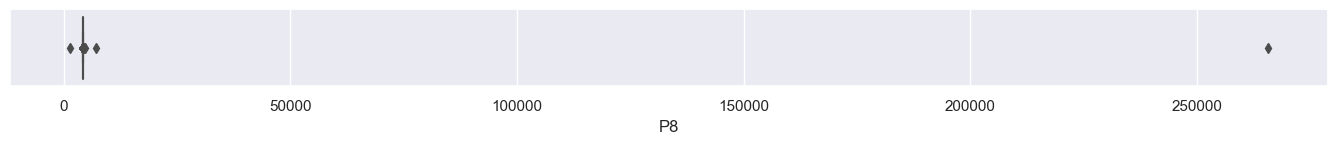

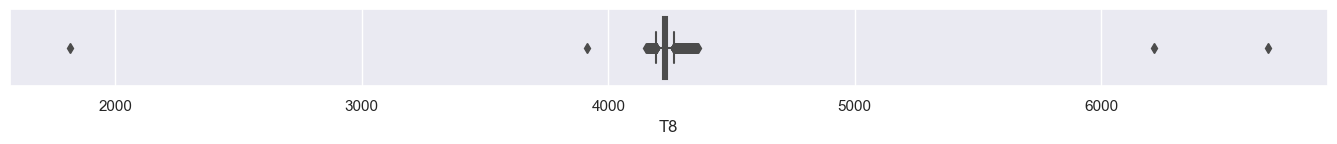

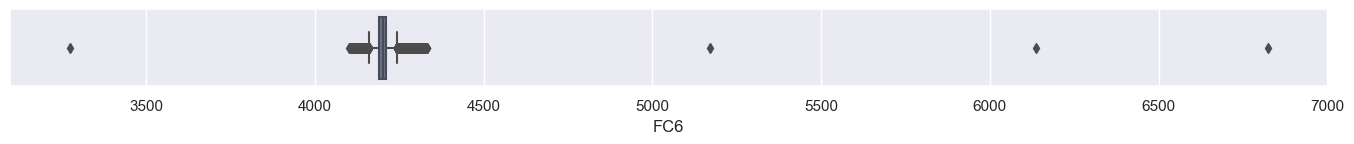

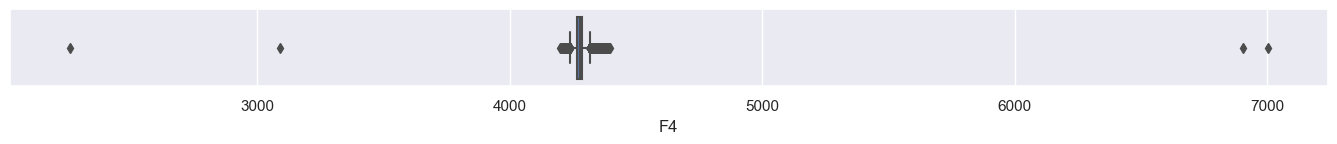

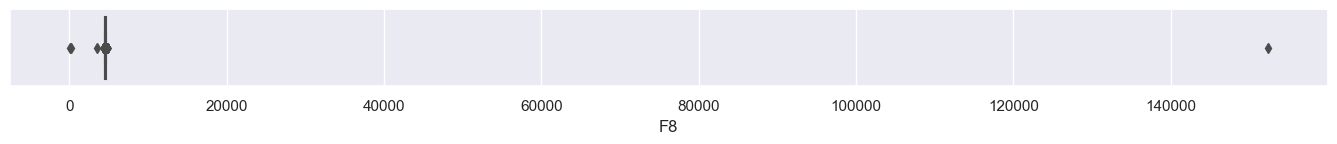

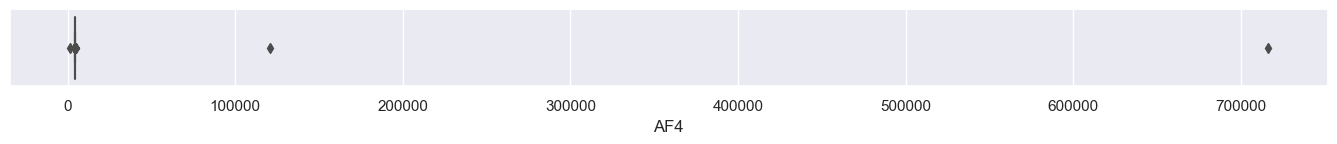

In [29]:
for column in data_1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data_1, x=column)

# Split data into train and test

In [34]:
X = data_1.copy()
y = df['eyeDetection'].copy()

In [42]:
scale =  MinMaxScaler()
X_scaled = scale.fit_transform(X)

In [43]:
#splitting the dataset into the testing and the training form
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# KNN

In [51]:
#Find the best value of hyperparameter
r = 0
i = 1
k = 1
while i <= math.sqrt(X_train.shape[0]):
    knn= KNeighborsClassifier(i, weights='distance', algorithm='auto' , leaf_size= 20, metric= 'minkowski')  
    knn.fit(X_train, y_train)
    y_pred_knn=knn.predict(X_test)
    r2 = accuracy_score(y_test,y_pred_knn)
    if r2 > r:
        r = r2
        k = i
    i += 1

if(k%2 == 0):
    k=k+1

print("Best value of hyperparameter k:", k)

Best value of hyperparameter k: 9


In [52]:
knn = KNeighborsClassifier(k, weights='distance', algorithm='auto', leaf_size= 20, metric= 'minkowski')  
knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test)

In [55]:
knn_acc = accuracy_score(y_test,y_pred_knn)
print(f"The Accuracy is :{knn_acc}")

The Accuracy is :0.8271028037383178


# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
# Create the Decision Tree regression model
tree_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(tree_model, param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and random state from the GridSearchCV
best_params = grid_search.best_params_
best_random_state = grid_search.best_estimator_.random_state

# Create the final Decision Tree model with the best hyperparameters and random state
final_tree_model = DecisionTreeClassifier(random_state=best_random_state, **best_params)

# Fit the final model to the training data
final_tree_model.fit(X_train, y_train)

y_pred_tree=final_tree_model.predict(X_test)

In [57]:
tree_acc = accuracy_score(y_test,y_pred_tree)
print(f"The Accuracy is :{tree_acc}")

The Accuracy is :0.835113484646195


# XgBoost

In [92]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
predictor_xgb = xgbc.fit(X_train, y_train)
y_pred = predictor_xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
print(f"The Accuracy is :{xgb_acc}")

The Accuracy is :0.9255674232309746


# LSTM

In [75]:
inputs = tf.keras.Input(shape=(14,1))

Dense1 = Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)

#Dense2 = Dense(128, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(Dense1)
#Dense3 = Dense(256, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(Dense2)

lstm_1=  Bidirectional(LSTM(256, return_sequences = True))(Dense1)
drop = tf.keras.layers.Dropout(0.3)(lstm_1)
lstm_3=  Bidirectional(LSTM(128, return_sequences = True))(drop)
drop2 = tf.keras.layers.Dropout(0.3)(lstm_3)

flat = Flatten()(drop2)

#Dense_1 = Dense(256, activation = 'relu')(flat)

Dense_2 = Dense(128, activation = 'relu')(flat)
outputs = Dense(1, activation='sigmoid')(Dense_2)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 14, 1)]           0         
                                                                 
 dense_4 (Dense)             (None, 14, 64)            128       
                                                                 
 bidirectional (Bidirectiona  (None, 14, 512)          657408    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 14, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 14, 256)          656384    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 256)           0     

In [78]:
# Train the model
# model=tf.keras.Sequential()
# model.add(LSTM(100,input_shape=(14,1)))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(Dense(32))
# model.add(Dense(16))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
opt_adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
history=model.fit(X_train,y_train, epochs=20, batch_size=70,validation_data=(X_test,y_test),
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)],verbose=1,shuffle=False)
# model.summary()

Epoch 1/20
172/172 [==============================] - 21s 99ms/step - loss: 0.6966 - accuracy: 0.5567 - val_loss: 0.6945 - val_accuracy: 0.5294
Epoch 2/20
172/172 [==============================] - 17s 98ms/step - loss: 0.6886 - accuracy: 0.5567 - val_loss: 0.6919 - val_accuracy: 0.5294
Epoch 3/20
172/172 [==============================] - 17s 101ms/step - loss: 0.6873 - accuracy: 0.5567 - val_loss: 0.6916 - val_accuracy: 0.5294
Epoch 4/20
172/172 [==============================] - 18s 106ms/step - loss: 0.6870 - accuracy: 0.5567 - val_loss: 0.6916 - val_accuracy: 0.5294
Epoch 5/20
172/172 [==============================] - 19s 109ms/step - loss: 0.6869 - accuracy: 0.5567 - val_loss: 0.6916 - val_accuracy: 0.5294
Epoch 6/20
172/172 [==============================] - 19s 113ms/step - loss: 0.6869 - accuracy: 0.5567 - val_loss: 0.6916 - val_accuracy: 0.5294
Epoch 7/20
172/172 [==============================] - 20s 116ms/step - loss: 0.6872 - accuracy: 0.5567 - val_loss: 0.6916 - val_accu

In [79]:
test_predict = model.predict(X_test)
test_predict = np.array(test_predict >= 0.5, dtype = np.int64)

94/94 [==============================] - 3s 18ms/step


In [93]:
lstm_acc = model.evaluate(X_test, y_test)[1]
print(f"The Accuracy is :{lstm_acc}")

94/94 [==============================] - 2s 17ms/step - loss: 0.6922 - accuracy: 0.5294
The Accuracy is :0.52937251329422


In [85]:
print("Accuracy for Neural Network model on test data: {}%".format(round((model.evaluate(X_test, y_test)[1]*100),2)))

94/94 [==============================] - 2s 18ms/step - loss: 0.6922 - accuracy: 0.5294
Accuracy for Neural Network model on test data: 52.94%


# Compare results

In [94]:
#sort by model by accuracy
models = pd.DataFrame({
    'Model': ['KNN', 'XgBoost', 'Decision Tree', 'LSTM'],
    'Score': [knn_acc, xgb_acc, tree_acc, lstm_acc]})
models = models.sort_values(by='Score', ascending=False)
models

,Model,Score
1,XgBoost,0.925567
2,Decision Tree,0.835113
0,KNN,0.827103
3,LSTM,0.529373


# EEG Eye State Classification

# Introduction:
This study presents an analysis of the EEG Eye State dataset using various machine learning models for classification. The dataset involves EEG measurements and the classification of whether a subject's eyes were open or closed. Four different models were applied: XGBoost, Decision Tree, K-Nearest Neighbors (KNN), and Long Short-Term Memory (LSTM) networks. The primary goal is to compare the performance of these models in classifying eye states based on EEG measurements.

# Dataset:
The EEG Eye State dataset comprises EEG measurements recorded during tasks involving open and closed eyes. Each observation includes multiple features derived from EEG signals. The binary classification task involves predicting whether the subject's eyes were open (1) or closed (0) at a given time.

# Models and Results:

1. XGBoost:

- XGBoost achieved a classification accuracy score of 0.925567.
- XGBoost is an ensemble learning algorithm that combines the predictions of multiple decision trees to improve predictive performance.

2. Decision Tree:

- The Decision Tree model achieved a classification accuracy score of 0.835113.
- Decision Trees are simple yet effective models that partition the feature space based on the features' values.

3. K-Nearest Neighbors (KNN):

- The KNN model achieved a classification accuracy score of 0.827103.
- KNN is a non-parametric classification algorithm that assigns labels based on the majority class among the k-nearest neighbors.

4. Long Short-Term Memory (LSTM) Network:

- The LSTM model achieved a classification accuracy score of 0.529373.
- LSTMs are a type of recurrent neural network (RNN) designed to model sequences and time series data.

# Steps of Analysis:

1. Data Preprocessing:
- Load and inspect the EEG Eye State dataset.
- Check null values

2. Exploratory Data Analysis (EDA):
- Visualize the distributions of EEG measurements for open and closed eye states.
- Analyze correlations among features and their impact on the target variable.

3. Modeling and Evaluation:
- Implement XGBoost, Decision Tree, KNN, and LSTM models.
- Train each model on the dataset and evaluate using accuracy score.

4. Comparison and Conclusion:
- Compare the performance of the four models using their accuracy scores.
- Discuss the strengths and weaknesses of each model in the context of the EEG Eye State classification task.

# Conclusion:
The analysis of the EEG Eye State dataset showcases the performance of different machine learning models in classifying eye states based on EEG measurements. XGBoost demonstrated the highest accuracy score (0.925567), followed by Decision Tree (0.835113), KNN (0.827103), and LSTM (0.529373). The task provides a comprehensive overview of the analysis process, allowing readers to understand the implications of each model's performance in the EEG Eye State classification context and make informed decisions for similar classification tasks.